In [643]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
%matplotlib inline

In [611]:
inflow = list()
for x in np.arange(100):
    z = 10 + (np.random.random_sample() - .5) / 1.5
    inflow.append(z)

for x in np.arange(100):
    y = 5 + (np.random.random_sample() -.5) / 2
    inflow.append(y)
    
for x in np.arange(100):
    y = 0 + np.random.random_sample() / 10
    inflow.append(y)

In [612]:
valvepos = list()
for x in np.arange(50):
    valvepos.append(1)
for x in np.arange(25):
    valvepos.append(.5)
for x in np.arange(25):
    valvepos.append(0)
for x in np.arange(25):
    valvepos.append(.75)
for x in np.arange(25):
    valvepos.append(.5)
for x in np.arange(25):
    valvepos.append(0)
for x in np.arange(25):
    valvepos.append(.25)
for x in np.arange(50):
    valvepos.append(1)
for x in np.arange(50):
    valvepos.append(0)

In [613]:
outflow = list()
for x in valvepos[:100]:
    z = (10 + (np.random.random_sample() - .5) / 1.5) * .9 * x
    outflow.append(z)

for x in valvepos[100:200]:
    y = (5 + (np.random.random_sample() -.5) / 2) * .9 * x
    outflow.append(y)
    
for x in valvepos[200:300]:
    y = 0 + np.random.random_sample() / 10 * x
    outflow.append(y)

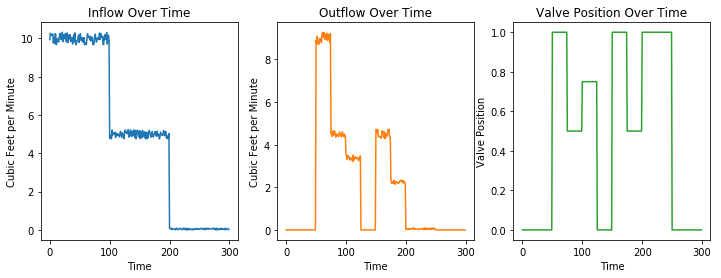

In [614]:
plt.figure(figsize = [12,4])
plt.subplot(131)
plt.title('Inflow Over Time')
plt.xlabel('Time')
plt.ylabel('Cubic Feet per Minute')
plt.plot(tinflow)
plt.subplot(132)
plt.plot(toutflow, color = '#ff7f0e')
plt.title('Outflow Over Time')
plt.xlabel('Time')
plt.ylabel('Cubic Feet per Minute')
plt.subplot(133)
plt.plot(tvalvepos, color = '#2ca02c')
plt.title('Valve Position Over Time')
plt.xlabel('Time')
plt.ylabel('Valve Position')
plt.savefig('testtrifig.png',dpi = 300)

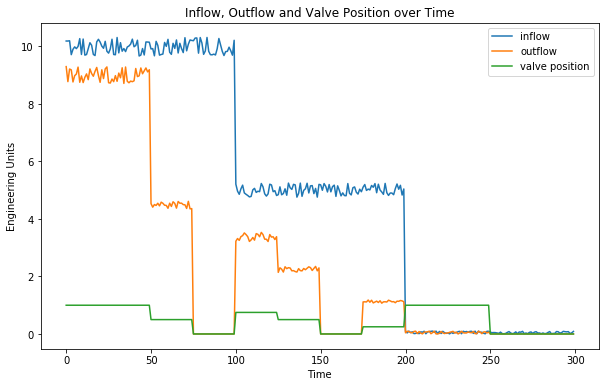

In [615]:
plt.figure(figsize = [10,6])
plt.plot(inflow)
plt.plot(outflow)
plt.plot(valvepos)
plt.title('Inflow, Outflow and Valve Position over Time')
plt.ylabel('Engineering Units')
plt.xlabel('Time')
plt.legend(['inflow', 'outflow', 'valve position'])
plt.savefig('3overlay.png', dpi=300)

In [616]:
df = pd.DataFrame(data = {'inflow': inflow,'outflow': outflow,'valvepos': valvepos})

In [617]:
df.head()

,inflow,outflow,valvepos
0,10.190575,9.299956,1.0
1,10.189784,8.778072,1.0
2,10.199206,9.216422,1.0
3,9.716101,9.186759,1.0
4,9.902338,8.766550,1.0


In [618]:
tvalvepos = list()
for x in np.arange(50):
    tvalvepos.append(0)
for x in np.arange(25):
    tvalvepos.append(1)
for x in np.arange(25):
    tvalvepos.append(.5)
for x in np.arange(25):
    tvalvepos.append(.75)
for x in np.arange(25):
    tvalvepos.append(0)
for x in np.arange(25):
    tvalvepos.append(1)
for x in np.arange(25):
    tvalvepos.append(.5)
for x in np.arange(50):
    tvalvepos.append(1)
for x in np.arange(50):
    tvalvepos.append(0)

In [619]:
toutflow = list()
for x in tvalvepos[:100]:
    z = (10 + (np.random.random_sample() - .5) / 1.5) * .9 * x
    toutflow.append(z)

for x in tvalvepos[100:200]:
    y = (5 + (np.random.random_sample() -.5) / 2) * .9 * x
    toutflow.append(y)
    
for x in tvalvepos[200:300]:
    y = 0 + np.random.random_sample() / 10 * x
    toutflow.append(y)

In [620]:
tinflow = list()
for x in np.arange(100):
    z = 10 + (np.random.random_sample() - .5) / 1.5
    tinflow.append(z)

for x in np.arange(100):
    y = 5 + (np.random.random_sample() -.5) / 2
    tinflow.append(y)
    
for x in np.arange(100):
    y = 0 + np.random.random_sample() / 10
    tinflow.append(y)

In [621]:
test_df = pd.DataFrame(data = {'inflow': tinflow,'outflow': toutflow,'valvepos': tvalvepos})

In [622]:
lr = LinearRegression()
mlpr = MLPRegressor(max_iter=1000, hidden_layer_sizes=(100,))

In [623]:
of_model = lr.fit(df.drop('outflow', axis=1), df['outflow'])
mlpr_model = mlpr.fit(df.drop('outflow', axis=1), df['outflow'])
result1 = of_model.predict(df.drop('outflow', axis=1))
result2 = mlpr_model.predict(df.drop('outflow', axis=1))

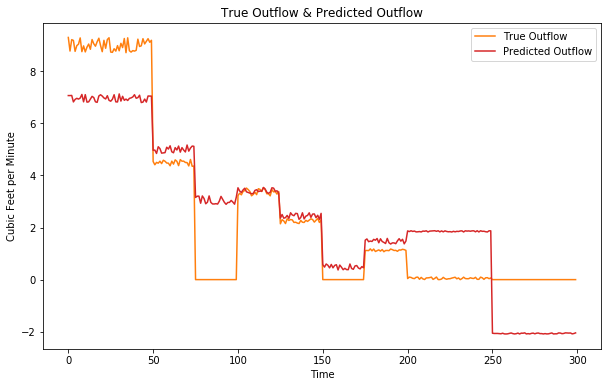

In [624]:
plt.figure(figsize = [10,6])
plt.plot(outflow, color='#ff7f0e')
plt.plot(result1, color='#d62728')
plt.title('True Outflow & Predicted Outflow')
plt.ylabel('Cubic Feet per Minute')
plt.xlabel('Time')
plt.legend(['True Outflow', 'Predicted Outflow'])
plt.savefig('simplelr.png', dpi=300)

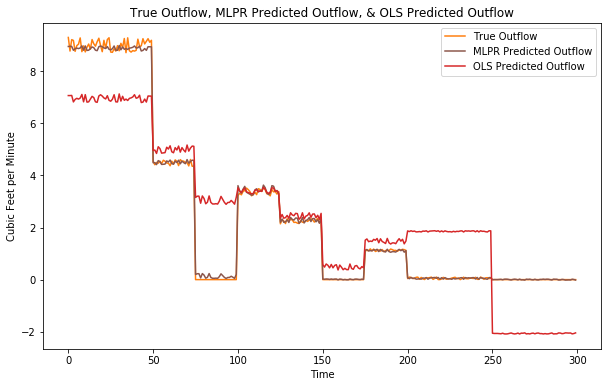

In [625]:
plt.figure(figsize = [10,6])
plt.plot(outflow, color='#ff7f0e')
plt.plot(result2, color='#8c564b')
plt.plot(result1, color='#d62728')
plt.title('True Outflow, MLPR Predicted Outflow, & OLS Predicted Outflow')
plt.ylabel('Cubic Feet per Minute')
plt.xlabel('Time')
plt.legend(['True Outflow', 'MLPR Predicted Outflow', 'OLS Predicted Outflow'])
plt.savefig('mlprtrain.png', dpi=300)

In [626]:
list(zip(df.drop('outflow', axis=1).columns, of_model.coef_))

[('inflow', 0.51445275297286452), ('valvepos', 3.9175796978962287)]

In [627]:
df['interaction'] = df['inflow'] * df['valvepos']

In [628]:
lri = LinearRegression()
of_interaction_model = lri.fit(df.drop('outflow', axis=1), df['outflow'])

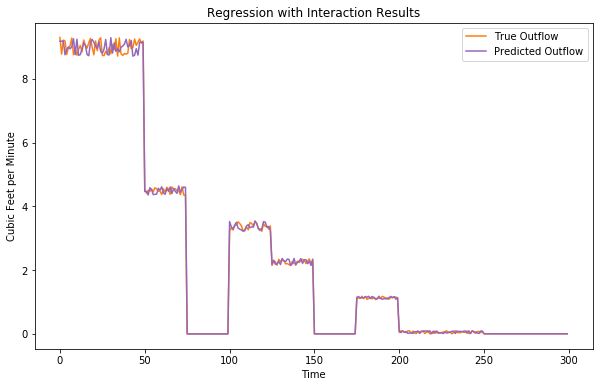

In [629]:
plt.figure(figsize=[10,6])
plt.plot(outflow, color='#ff7f0e')
plt.plot(of_interaction_model.predict(df.drop('outflow', axis=1)), color='#9467bd')
plt.title('Regression with Interaction Results')
plt.xlabel('Time')
plt.ylabel('Cubic Feet per Minute')
plt.legend(['True Outflow', 'Predicted Outflow'])
plt.savefig('results2.png', dpi=300)

In [630]:
r2_score(outflow, of_interaction_model.predict(df.drop('outflow', axis=1)))

0.99843324030260205

In [631]:
list(zip(df.drop('outflow', axis=1).columns, of_interaction_model.coef_))

[('inflow', -0.00049879717739691252),
 ('valvepos', 0.0035394577480836213),
 ('interaction', 0.90130397946045038)]

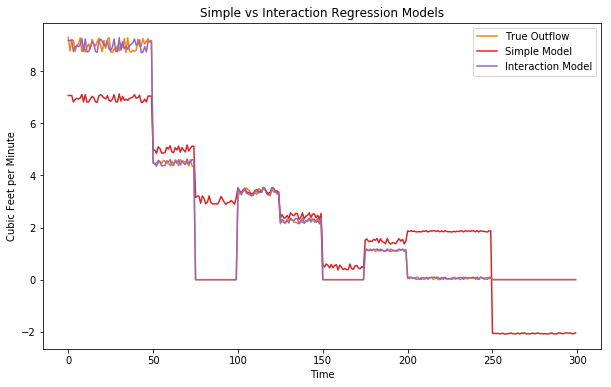

In [632]:
plt.figure(figsize=[10,6])
plt.plot(outflow, color = '#ff7f0e')
plt.plot(result1, color = '#d62728')
plt.plot(of_interaction_model.predict(df.drop('outflow', axis=1)), color='#9467bd')
plt.title('Simple vs Interaction Regression Models')
plt.ylabel('Cubic Feet per Minute')
plt.xlabel('Time')
plt.legend(['True Outflow','Simple Model', 'Interaction Model'])
plt.savefig('interactionOLS_train.png', dpi=300)

In [633]:
test_df['interaction'] = test_df['inflow'] * test_df['valvepos']

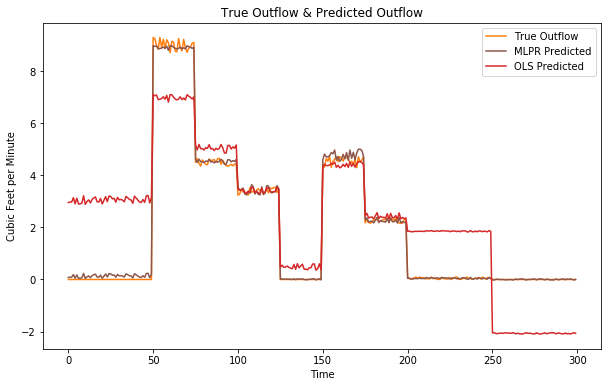

In [634]:
plt.figure(figsize = [10,6])
plt.plot(toutflow, color='#ff7f0e')
plt.plot(mlpr_model.predict(test_df.drop(['outflow', 'interaction'], axis=1)), color='#8c564b')
#plt.plot(of_interaction_model.predict(test_df.drop('outflow', axis=1)), color='#9467bd')
plt.plot(of_model.predict(test_df.drop(['outflow', 'interaction'], axis=1)), color ='#d62728')
plt.title('True Outflow & Predicted Outflow')
plt.ylabel('Cubic Feet per Minute')
plt.xlabel('Time')
plt.legend(['True Outflow', 'MLPR Predicted', 'OLS Predicted'])
plt.savefig('all_testdata.png', dpi=300)

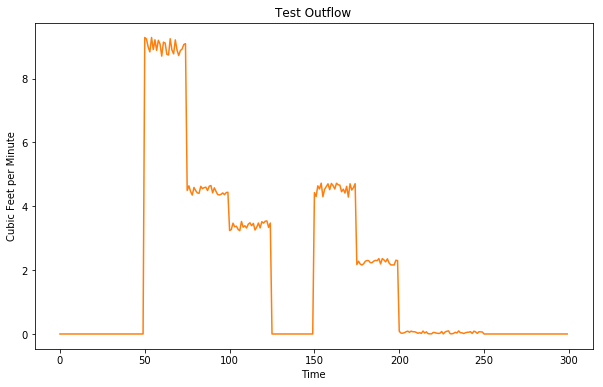

In [635]:
plt.figure(figsize = [10,6])
plt.plot(test_df['outflow'], color='#ff7f0e')
plt.title('Test Outflow')
plt.ylabel('Cubic Feet per Minute')
plt.xlabel('Time')
plt.savefig('testoutflow.png', dpi = 300)

In [636]:
x = np.arange(0,300)
fx = np.random.randn(300)
hx = np.random.randn(300)
y = fx**2*np.cos(hx)
data_df = pd.DataFrame({'f(x)':fx, 'h(x)':hx, 'g(x)':y})
x = np.arange(0,300)
fx = np.random.randn(300)
hx = np.random.randn(300)
y = fx**2*np.cos(hx)
test_df = pd.DataFrame({'f(x)':fx, 'h(x)':hx, 'g(x)':y})

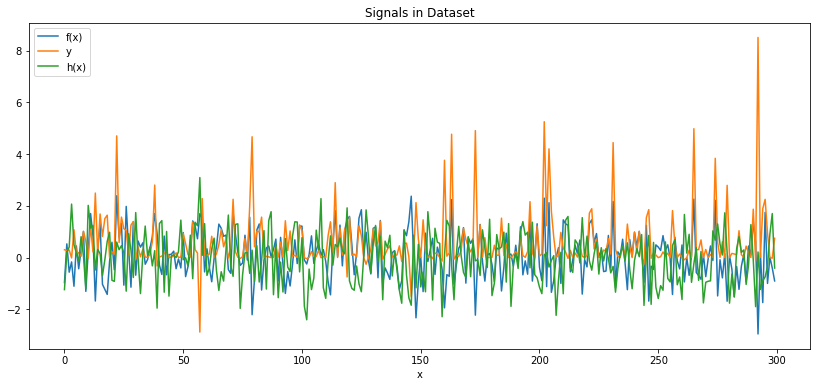

In [637]:
plt.figure(figsize = [14,6])
plt.plot(data_df['f(x)'])
plt.plot(data_df['g(x)'])
plt.plot(data_df['h(x)'])
plt.xlabel('x')
plt.legend(['f(x)', 'y', 'h(x)'])
plt.title('Signals in Dataset')
plt.savefig('allsignals.png', dpi=300)

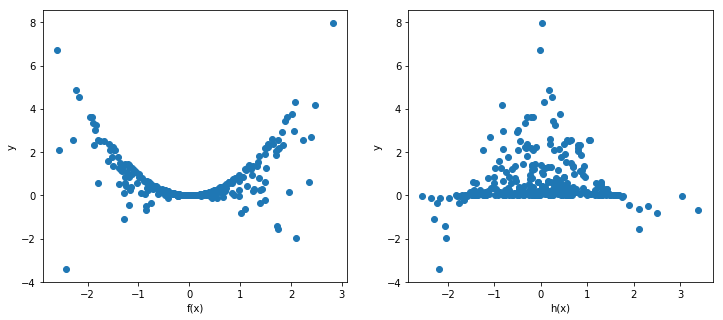

In [638]:
plt.figure(figsize = [12,5])
plt.subplot(121)
plt.ylabel('y')
plt.xlabel('f(x)')
plt.scatter(fx,y)
plt.subplot(122)
plt.scatter(hx,y)
plt.ylabel('y')
plt.xlabel('h(x)')
plt.savefig('yvsfxhx.png', dpi = 300)

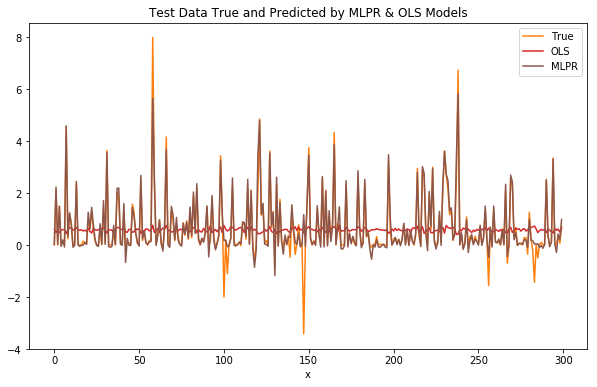

In [639]:
mlpr = MLPRegressor(hidden_layer_sizes=(1000,), max_iter=10000, activation = 'relu', solver = 'adam', alpha = .0001)
mlpr_model = mlpr.fit(data_df.drop('g(x)', axis = 1),data_df['g(x)'])
ols_model = lr.fit(data_df.drop('g(x)', axis =1),data_df['g(x)']);
plt.figure(figsize = [10,6])
plt.title('Test Data True and Predicted by MLPR & OLS Models')
plt.plot(test_df['g(x)'], color='#ff7f0e')
plt.plot(ols_model.predict(test_df.drop('g(x)', axis =1)), color ='#d62728')
plt.plot(mlpr_model.predict(test_df.drop('g(x)', axis =1)), color='#8c564b')
plt.xlabel('x')
plt.legend(['True','OLS', 'MLPR']);
plt.savefig('testcompare.png',dpi=300)

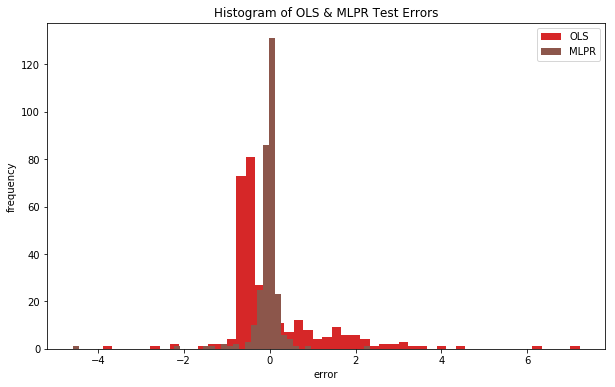

In [640]:
plt.figure(figsize = [10,6])
plt.hist(test_df['g(x)'] - ols_model.predict(test_df.drop('g(x)', axis =1)), bins = 50, color ='#d62728');
plt.hist(test_df['g(x)'] - mlpr_model.predict(test_df.drop('g(x)', axis =1)), bins = 50, color='#8c564b');
plt.legend(['OLS', 'MLPR'])
plt.ylabel('frequency')
plt.xlabel('error')
plt.title('Histogram of OLS & MLPR Test Errors');
plt.savefig('histerrors.png',dpi = 300)

In [641]:
r2_score(data_df['g(x)'], ols_model.predict(data_df.drop('g(x)', axis =1)))

0.0034496281404161611

In [642]:
r2_score(data_df['g(x)'], mlpr_model.predict(data_df.drop('g(x)', axis =1)))

0.96071947610199526